In [41]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from PIL import Image, ImageOps

In [75]:
from cadl import draw, gif, utils

In [16]:
# Training parameters.
A = 64
B = 64
C = 3
T = 20
n_enc = 512
n_z = 196
n_dec = 512
read_n = 15
write_n = 15
batch_size = 64

In [5]:
%ls examples/

album1.jpg  loss.png               manifold_00050928.gif  montage.png
album2.jpg  manifold_00000000.gif  manifold_00075880.gif  recon_histogram.png
album3.jpg  manifold_00010000.gif  manifold_00100856.gif  test_xs.png
album4.jpg  manifold_00020976.gif  manifold_00116832.gif


In [71]:
imgs = []
paths = ["examples/album1.jpg", 
         "examples/album2.jpg", 
         "examples/album3.jpg",
         "examples/album4.jpg"]
for path in paths:
    img = Image.open(path)
    img = ImageOps.fit(img, (A, B), method=Image.BILINEAR)
    imgs.append(np.array(img))
imgs = np.array(imgs * 16)

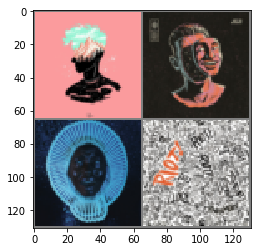

In [84]:
m = utils.montage(imgs[:4] / 255.0)
plt.imshow(m, aspect='equal')

In [26]:
sess = tf.InteractiveSession()
model = draw.create_model(
    A=A,
    B=B,
    C=C,
    T=T,
    batch_size=batch_size,
    n_enc=n_enc,
    n_z=n_z,
    n_dec=n_dec,
    read_n=read_n,
    write_n=write_n)
saver = tf.train.Saver()
ckpt = tf.train.latest_checkpoint('draw/')
if ckpt:
    print("Restoring from checkpoint:", ckpt)
    saver.restore(sess, ckpt)

Restoring from checkpoint: draw/draw.ckpt-116832
INFO:tensorflow:Restoring parameters from draw/draw.ckpt-116832


In [89]:
# Plot example reconstructions for unseen artwork.
n_images = 4
noise = np.random.randn(len(imgs), n_z)
recon = sess.run(
    model['canvas'],
    feed_dict={model['x']: imgs.reshape(-1, A*B*C)/255.0,
               model['noise']: noise})
montages = [utils.montage(r.reshape(-1, A, B, C)[:n_images]) for r in recon]

In [90]:
gif.build_gif(
    montages,
    saveto='examples/experiment_recon.gif')